# Herramientas estadísticas: funciones estadísticas, histogramas y ejemplos de distribuciones

En las clases pasadas estuvimos trabajando un poco con histogramas y funciones gaussianas. Ahora, vamos a profundizar un poco en las posibilidades de análisis estadístico que nos ofrece Python, SciPy específicamente. Pero primero recordemos algunos conceptos básicos de estadística.

## Medidas de tendencia central

De estas hay muchas pero las tres más comunes son la media (promedio), mediana y moda (valor más probable). 

### Media

Es el mismo promedio, para una variable $x$ se define como

$$\bar{x} = \dfrac{\sum{x_i}}{N} $$

### Mediana

Es el valor que divide el conjunto de datos en dos partes iguales una vez estos han sido ordenados de menor a mayor. Esto es equivalente a decir que hay tantos datos mayores como menores a este dato en la distribución. Si el número de elementos del conjunto del cual se está calculando la mediana es par, se hace el promedio de los dos datos de la mitad. 

Ejemplo: 

sea $x$ = [1, 4, 7, 7, 3, 3, 1] la mediana del conjunto es $median(x) = 3$

Formalmente la mediana se define como el valor $x_m$ que divide la funcion de probabilidad $F(x)$ en partes iguales.

$$F(x_m) = \dfrac{1}{2}$$

### Moda

Es el valor con mayor probabilidad $x_p$, el que más se repite en el conjunto

Ejemplo: 

sea $x$ = [1, 4, 7, 7, 3, 2, 1] el valor mas probable es $x_p = 7$

## Ejemplo

Podríamos por ejemplo hacer nuestra propia implementación para el cálculo de la mediana con el código a continuación:

In [5]:
%pylab inline 

def mi_mediana(lista):
    x = sorted(lista)
    d = int(len(x)/2)
    if(len(x)%2==0):
        return (x[d-1] + x[d])*0.5
    else:
        return x[d-1]
    
x_input = [1,3,4,5,5,7,7,6,8,6]

print mi_mediana(x_input)

print(mi_mediana(x_input) == median(x_input))


Populating the interactive namespace from numpy and matplotlib
5.5
True


Ahí vimos que efectivamente concuerda con el valor que reporta la función nativa para hacer este cálculo. Afortundamente no tenemos que hacerlas nosotros mismos pues ya hay mucho código escrito al respecto, por ejemplo, usemos la función **randn** de *random* en *Numpy*

1.00101203131
0.0058873102605
0.00507631484812
68.197
95.454
99.739


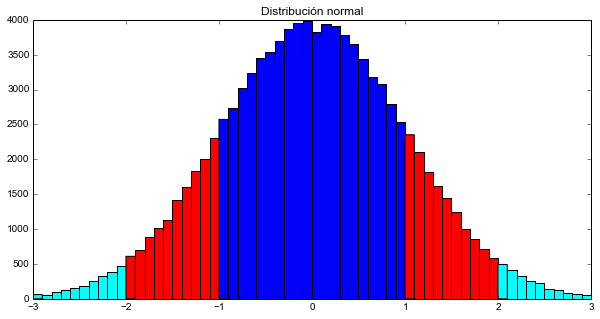

In [7]:
randnums=random.randn(100000)
# Desviación estándar
print std(randnums)
# El promedio
print mean(randnums)
# La mediana
print median(randnums)
aver=mean(randnums)
devi=std(randnums)
# contar
bra1=0
bra2=0
bra3=0
for n in randnums:
    if abs(n-aver)<devi:
        bra1+=1
    if abs(n-aver)<2*devi:
        bra2+=1
    if abs(n-aver)<3*devi:
        bra3+=1
# En una distribución normal el 68% de los datos están a una desviación
# estándar de la media,
print float(bra1)/len(randnums)*100
# 95% están a dos  desviaciones estándar,
print float(bra2)/len(randnums)*100
# y el 99.7% están a tres desviaciones estándar.
print float(bra3)/len(randnums)*100
figure(figsize=(10,5))
hist(randnums,10,range=(-3,-2),color="cyan")
hist(randnums,10,range=(-2,-1),color="red")
hist(randnums,20,range=(-1,1),color="blue")
hist(randnums,10,range=(1,2),color="red")
hist(randnums,10,range=(2,3),color="cyan")
xlim(-3,3)
title(u"Distribución normal")
show()

Efectivamente, **randn** genera números aleatorios con una distribución normal (gaussiana) centrada alrededor de cero y con varianza igual a 1. Y se puede ver cómo los datos están distribuidos con la desviación estándar respecto al valor central (promedio, moda y mediana toman el mismo valor para una distribución normal, como es evidente).

Ahora, hablando de histogramas veamos un par de ejemplos de ellos.

## Histogramas

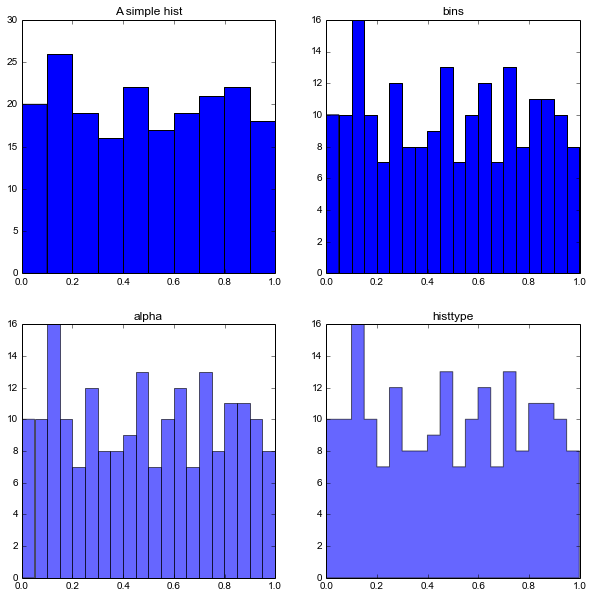

In [28]:
figure(figsize=(10,10))
x = random.random(200)
subplot(2,2,1)
title("A simple hist")
h = hist(x)
subplot(2,2,2)
title("bins")
h = hist(x, bins=20)
subplot(2,2,3)
title("alpha")
h = hist(x, bins=20, alpha=0.6)
subplot(2,2,4)
title("histtype")
h = hist(x, bins=20, alpha=0.6, histtype='stepfilled')

**hist** pertenece a *Matplotlib* y nos permite representar histogramas, eligiendo el número de *bins*, la transparencia (*alpha* igual a 0 es transparente, igual a 1 es opaco), lo cual es útil si se quiere representar varios histogramas superpuestos, el tipo de histograma*, etc

\* 
    ‘bar’ is a traditional bar-type histogram. If multiple data are given the bars are aranged side by side.
    ‘barstacked’ is a bar-type histogram where multiple data are stacked on top of each other.
    ‘step’ generates a lineplot that is by default unfilled.
    ‘stepfilled’ generates a lineplot that is by default filled.
(from *http://matplotlib.org/api/pyplot_api.html*)

## Ejemplos de distribuciones

Una de las más conocidas es la gaussiana

### Distribución Normal: Descripcion Matemática.

$$f(x, \mu, \sigma) = \dfrac{1}{\sigma \sqrt(2\pi)} e^{-\dfrac{(x-\mu)^2}{2\sigma^2}} $$

donde $\sigma$ es la desviación estándar y $\mu$ la media de los datos $x$

Es una función de distribución de probabilidad que está totalmente determinada por los parámetros $\mu$ y $\sigma$. 

La función es simétrica alrededor de $\mu$.

En python podemos usar scipy para hacer uso de la función normal.

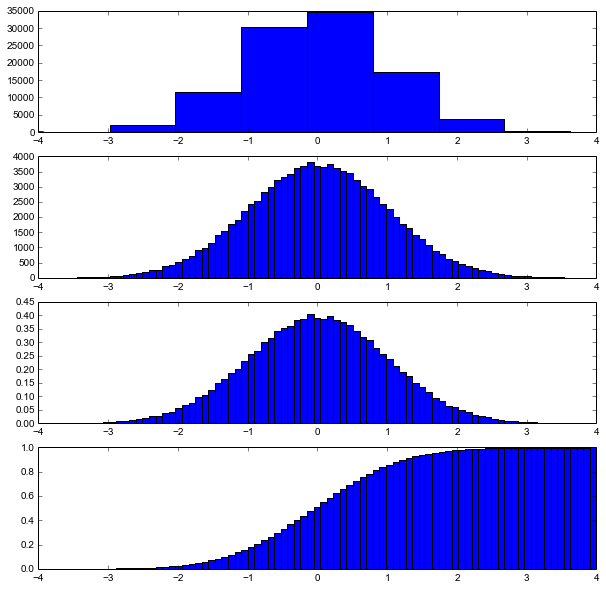

In [27]:
figure(figsize=(10,10))
subplot(4,1,1)
hist(randnums)
xlim(-4,4)
subplot(4,1,2)
# El número de bins puede modificarse
hist(randnums,bins=100)
xlim(-4,4)
# También puede hacerse un histograma normalizado
subplot(4,1,3)
hist(randnums,bins=100,normed=True)
xlim(-4,4)
# Histograma cumulativo
subplot(4,1,4)
hist(randnums,bins=100,normed=True,cumulative=True)
ylim(0,1)
xlim(-4,4)
show()

El tercer histograma es un histograma normalizado (el área debajo de la curva es igual a uno, por lo que se puede usar como probabilidad). El cuarto es un histograma cumulativo (representa la suma de las barritas hasta ese punto).

Miremos un par de distribuciones con diferente desviación estándar:

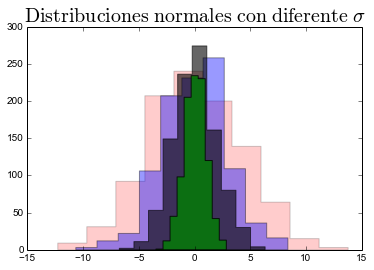

In [35]:
x = np.random.normal(0.0, 1.0, 1000)
y = np.random.normal(0.0, 2.0, 1000)
w = np.random.normal(0.0, 3.0, 1000)
z = np.random.normal(0.0, 4.0, 1000)

histo = hist(z, alpha=0.2, histtype="stepfilled", color='r')
histo = hist(w, alpha=0.4, histtype="stepfilled", color='b')
histo = hist(y, alpha=0.6, histtype="stepfilled", color='k')
histo = hist(x, alpha=0.8, histtype="stepfilled", color='g')

title(r"$\rm{Distribuciones\ normales\ con\ diferente\ \sigma}$", fontsize=20)

### Distribución de Poisson

Suponga por un momento que contamos el numero de personas que cruzan el puente que conecta el ML con el LL en un intervalo de 10 min.
Despues de medir 100 veces que distribución de probabilidad obtendremos?

Seguramente será bien descrita por una distribucion de Poisson.

$$f(k, \lambda) = \dfrac{e^{-\lambda}\lambda^k}{k!}$$

$k$ representa el numero de personas que pasan en cada medición. Siempre es un numero entero.

$\lambda$ representa el número de veces que pase un evento en el intervalo estudiado. En este casos sería el numero de personas que esperamos que pasen en 10 min. $\lambda > 0$ 

Esta distribución representa muy bien eventos que ocurren aleatoriamente en un periodo de tiempo.

En una distribución de Poisson el promedio es igual al cuadrado de la desviación estándar: 
$\bar{x} = \sigma^2$

Grafiquemos esta distribución usando $k$ = [0, 100] y $\lambda = 20$

En python podemos usar la funcion poisson de scipy. Para python ($x=k$) y ($\mu = \lambda$)
En esta clase veremos las funciones mas importantes, para revisar los parámetros de cada 
funcion se puede usar **poisson**

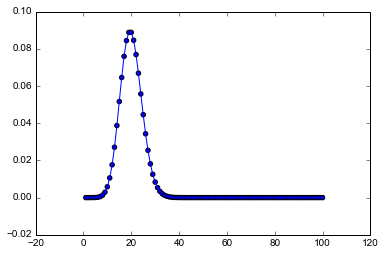

In [37]:
from scipy.stats import *
x = np.linspace(1, 100, 100)
y = poisson.pmf(x, 20)

scatter(x, y)
plot(x, y)


¿Qué pasa si cambiamos $\lambda$ ? 

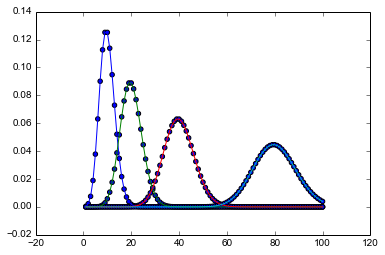

In [38]:
y10 = poisson.pmf(x, 10)
y20 = poisson.pmf(x, 20)
y40 = poisson.pmf(x, 40)
y80 = poisson.pmf(x, 80)


scatter(x, y10)
plot(x, y10)
scatter(x, y20)
plot(x, y20)
scatter(x, y40)
plot(x, y40)
scatter(x, y80)
plot(x, y80)

¿Cual será la probabilidad de que pasen 50 personas en 10 min?
poisson.stats nos retorna, la media, la varianza, skew (medida de la asimetría de la distribución), kurtosis (medida de lo "picuda" que es la distribución)

In [39]:
poisson.stats(60, moments="mvsk")

(array(60.0),
 array(60.0),
 array(0.12909944487358055),
 array(0.016666666666666666))

Asumamos que en 10 min pasan 60 personas. 
¿Cuál es la probabilidad de que cuando mida hayan pasado entre 0 y 60 personas?

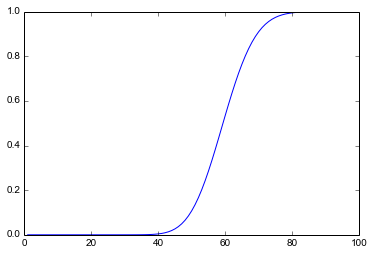

In [42]:
x = np.linspace(1, 100, 100)
y = poisson.cdf(x, 60)  ## Función de densidad acumulada, como para los histogramas

plot(x, y)

Igualmente podemos generar números aleatorios con una distribución de Poisson

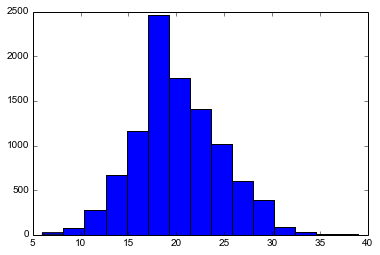

In [47]:
r = poisson.rvs(20, size=10000)
h = hist(r, bins=15)

### Distribución Binomial

$$f(k;n, p) = \dfrac{n!}{k!(n-k)!}p^k (1-p)^{(n-k)}$$

Mide el numero de éxitos que se tiene en un secuencia de $n$ medidas. La probabilidad de obtener $k$ en las $n$ medidas está dada por la distribución de Poisson, y $p$ es la probabilidad de sacar el valor $k$.

En python se puede usar scipy.stats.binom y funciona de manera analoga a poisson.